# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'E:\iti ai\machine2\countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-     convert object datatype to numeric and replace the "," in float to "."     <br>
2-           <br>
3-           <br>

In [9]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue:'.' instead of ',' and converting object type to numeric**

In [10]:
#replacing',' with '.' in float datatype
df_copy=df_copy.apply(lambda x: x.replace({',':'.'}, regex = True))


In [11]:
df_copy['Pop. Density (per sq. mi.)'] 

0       48.0
1      124.6
2       13.8
3      290.4
4      152.1
       ...  
222    419.9
223      1.0
224     40.6
225     15.3
226     31.3
Name: Pop. Density (per sq. mi.), Length: 227, dtype: object

In [12]:
#solution for object type except first 2 columns

list_str_obj_cols = df_copy.columns[df_copy.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    if str_obj_col !='Country' and str_obj_col !='Region':
        df_copy[str_obj_col] =pd.to_numeric(df_copy[str_obj_col])

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [14]:
df_copy.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [15]:
coun_reg=df_copy[['Country', 'Region']]
coun_reg

,Country,Region
0,Afghanistan,ASIA (EX. NEAR EAST)
1,Albania,EASTERN EUROPE
2,Algeria,NORTHERN AFRICA
3,American Samoa,OCEANIA
4,Andorra,WESTERN EUROPE
...,...,...
222,West Bank,NEAR EAST
223,Western Sahara,NORTHERN AFRICA
224,Yemen,NEAR EAST
225,Zambia,SUB-SAHARAN AFRICA


**Second issue: dealing with missing valued**

In [16]:
numirc=df_copy.drop(columns=['Country', 'Region'])
numirc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          227 non-null    int64  
 1   Area (sq. mi.)                      227 non-null    int64  
 2   Pop. Density (per sq. mi.)          227 non-null    float64
 3   Coastline (coast/area ratio)        227 non-null    float64
 4   Net migration                       224 non-null    float64
 5   Infant mortality (per 1000 births)  224 non-null    float64
 6   GDP ($ per capita)                  226 non-null    float64
 7   Literacy (%)                        209 non-null    float64
 8   Phones (per 1000)                   223 non-null    float64
 9   Arable (%)                          225 non-null    float64
 10  Crops (%)                           225 non-null    float64
 11  Other (%)                           225 non-n

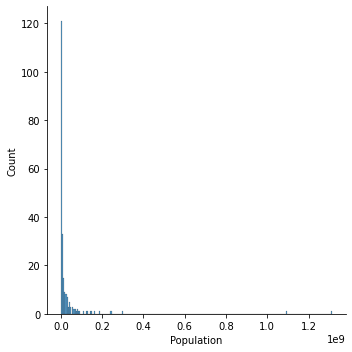

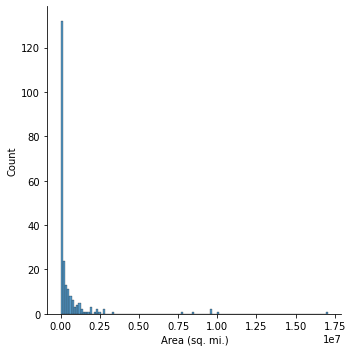

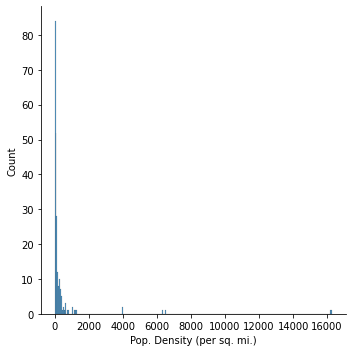

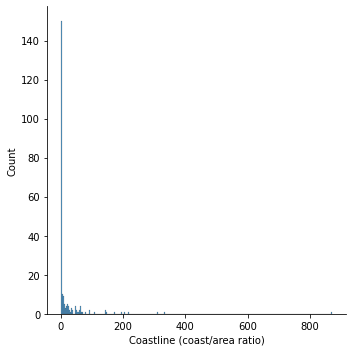

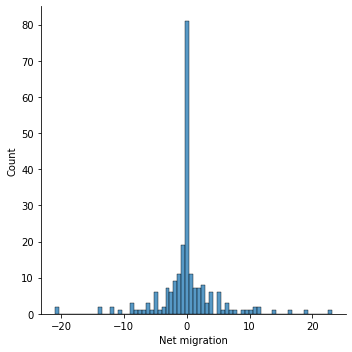

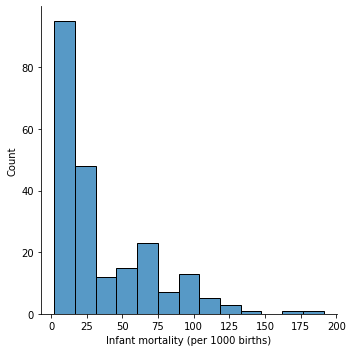

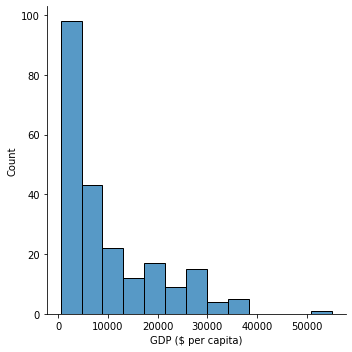

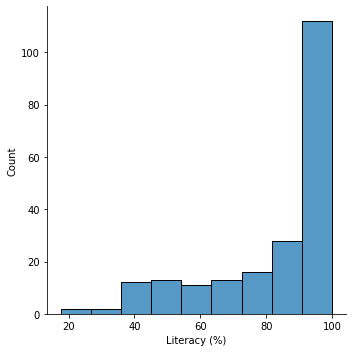

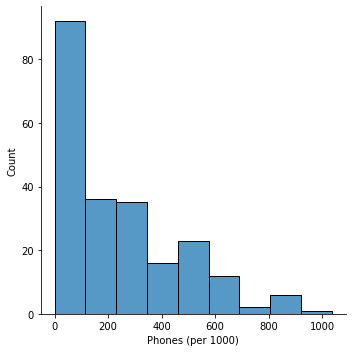

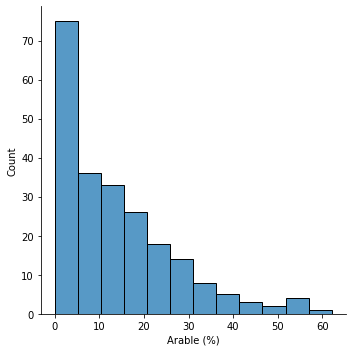

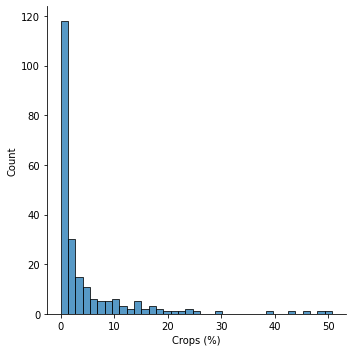

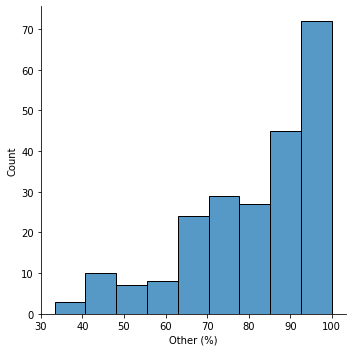

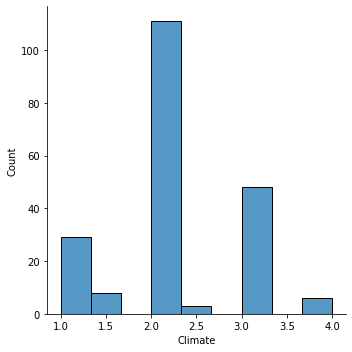

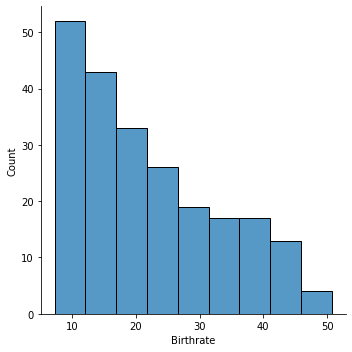

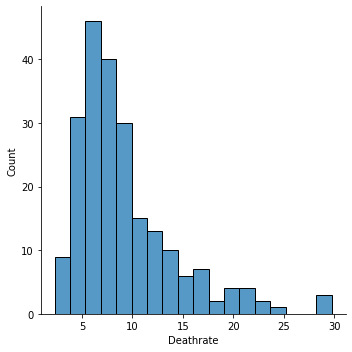

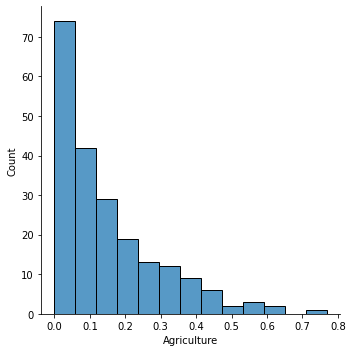

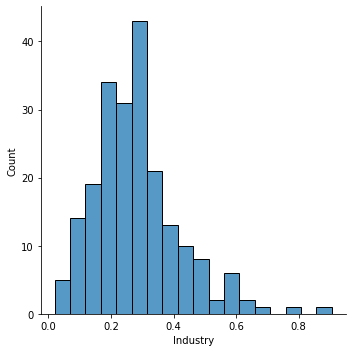

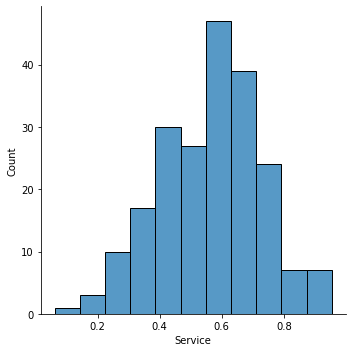

In [17]:
#solution fillinf missing values
for col in numirc:
    sns.displot(data=numirc, x=col)


In [18]:
numirc.isna().sum()

Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [19]:
numirc['Net migration'].fillna(value=numirc['Net migration'].mean(), inplace=True)
numirc['Net migration'].isna().sum()

0

In [20]:
for col in (numirc.iloc[:,5:]):
    numirc[col].fillna(value=numirc[col].median(), inplace=True)
numirc.isna().sum()


Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [21]:
scaler = PowerTransformer()
scaled = scaler.fit_transform(numirc)
scaled.shape


(227, 18)

In [22]:
numirc.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.315242,9671.585903,83.604405,235.006608,13.767357,4.533084,81.674097,2.125551,22.070793,9.216652,0.147419,0.281956,0.565661
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856710,35.193412,10030.645350,19.100523,226.103017,12.986425,8.330968,16.073758,0.665761,11.108805,4.949120,0.142429,0.133316,0.160249
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.435000,95.230000,2.250000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [23]:
scaled_df = pd.DataFrame(scaled, columns=numirc.columns)
scaled_df.describe()


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,227.000000,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02
mean,-2.738876e-17,-5.477752e-17,-4.382202e-16,7.825361e-17,6.847190e-18,7.355839e-16,-4.929977e-16,8.803531e-17,-3.756173e-16,-2.034594e-16,0.000000,1.682453e-16,1.799833e-16,2.371084e-15,-3.717046e-16,-1.252058e-16,-3.091017e-16,-3.130144e-17
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00
min,-2.057514e+00,-2.211651e+00,-3.055298e+00,-1.068804e+00,-4.464235e+00,-1.991800e+00,-1.871971e+00,-1.902400e+00,-1.970360e+00,-1.840660e+00,-1.274205,-2.031995e+00,-1.861224e+00,-1.997639e+00,-2.886928e+00,-1.611009e+00,-2.792498e+00,-2.931391e+00
25%,-7.936518e-01,-7.917764e-01,-5.840859e-01,-9.323132e-01,-1.853690e-01,-8.961762e-01,-8.663104e-01,-8.045725e-01,-8.376505e-01,-8.035624e-01,-0.964191,-8.193420e-01,-1.266338e-01,-8.436583e-01,-6.420959e-01,-8.960380e-01,-5.749188e-01,-7.773266e-01
50%,1.229236e-01,1.177864e-01,5.818880e-02,-3.639047e-01,2.372585e-03,-8.365195e-03,7.345042e-03,3.645654e-01,1.403721e-01,7.698482e-02,-0.166772,9.365956e-02,-1.266338e-01,-5.271888e-02,-4.458683e-02,-1.075334e-01,6.692270e-02,9.159596e-03
75%,6.871936e-01,7.453194e-01,6.121572e-01,1.016825e+00,2.036600e-01,9.134914e-01,9.151580e-01,8.980082e-01,8.396621e-01,7.421578e-01,0.840544,9.242338e-01,2.410570e-01,8.518631e-01,5.803701e-01,8.329718e-01,5.478065e-01,6.509073e-01
max,2.981733e+00,2.563923e+00,3.130223e+00,1.825052e+00,4.616618e+00,2.060702e+00,2.096190e+00,1.144582e+00,2.005878e+00,2.197647e+00,1.898424,1.406820e+00,2.491031e+00,1.851384e+00,2.418630e+00,2.067479e+00,3.002077e+00,2.552365e+00


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [38]:
def dendo(data,method,dis):
    plt.figure(figsize=(10, 7))
    plt.title("Counters Dendograms")
    dend = shc.dendrogram(shc.linkage(y=data, method=method,metric=dis),orientation='top') #fill y with your dataframe
                                                                                          #and method with linkage criteria
                                                                                          #and metric with distance function

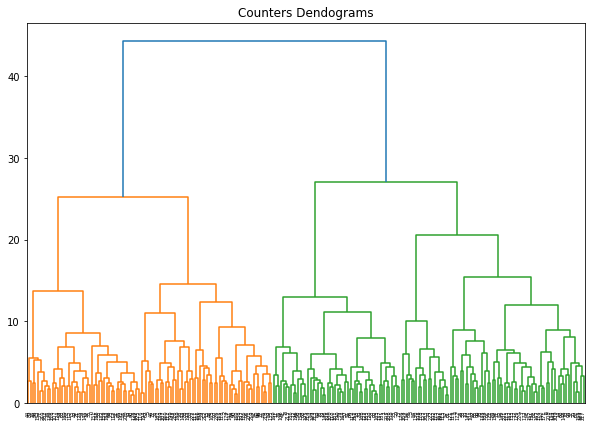

In [39]:
dendo(scaled_df,'ward','euclidean')

In [41]:
def Agglomerative(data,k):
    hc = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(data)
    print(y_hc)
    return y_hc

In [43]:
y1=Agglomerative(scaled_df,2)

[1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0
 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 1 1 1 1]


In [44]:
silhouette_score(scaled_df, y1, metric='euclidean')

0.21770489816515554

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [27]:
scaler =StandardScaler()
features =scaler.fit(numirc)
features =features.transform(numirc)
s_df =pd.DataFrame(features,columns=numirc.columns)
s_df.isna().sum()

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [31]:
X=s_df.values
pca=PCA(n_components=2)
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
reduced_X.head()

,PCA1,PCA2
0,5.267460,-2.358941
1,-0.231706,1.506652
2,1.171746,-1.883314
3,-0.572791,2.258393
4,-2.322469,-1.546645


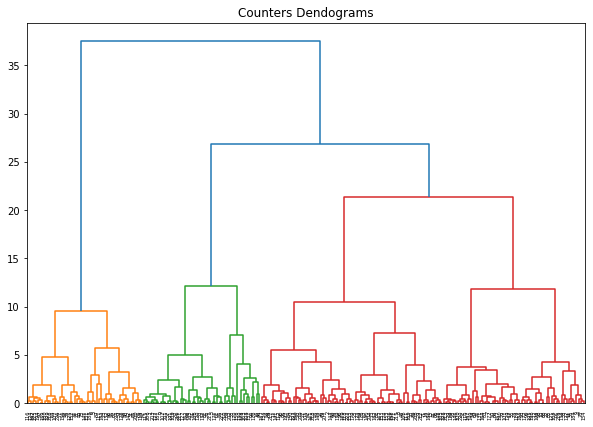

In [40]:
dend=dendo(reduced_X,'ward','euclidean')

In [45]:
y2=Agglomerative(reduced_X,2)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1]


In [46]:
silhouette_score(reduced_X,y2, metric='euclidean')

0.40163914516608595